<a href="https://colab.research.google.com/github/liumOazed/Forecasting/blob/main/sarimax_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
%cd /content/drive/MyDrive/Forecasting/5. Sarimax

/content/drive/MyDrive/Forecasting/5. Sarimax


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Churrasco.csv", index_col="Week", parse_dates=True)

In [ ]:
df.head()

,Churrasco,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0
2016-02-07,45,0,1,0
2016-02-14,40,0,0,0
2016-02-21,36,0,0,0
2016-02-28,39,0,0,0


In [ ]:
df.shape

(261, 4)

In [ ]:
df = df.rename(columns={"Churrasco":"y"})
df.head(1)

,y,Easter,Carnaval,Republic
Week,,,,
2016-01-31,42,0,0,0


In [ ]:
df.index

DatetimeIndex(['2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03',
               ...
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', name='Week', length=261, freq=None)

In [ ]:
df = df.asfreq("W")
df.index

DatetimeIndex(['2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06', '2016-03-13', '2016-03-20',
               '2016-03-27', '2016-04-03',
               ...
               '2020-11-22', '2020-11-29', '2020-12-06', '2020-12-13',
               '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10',
               '2021-01-17', '2021-01-24'],
              dtype='datetime64[ns]', name='Week', length=261, freq='W-SUN')

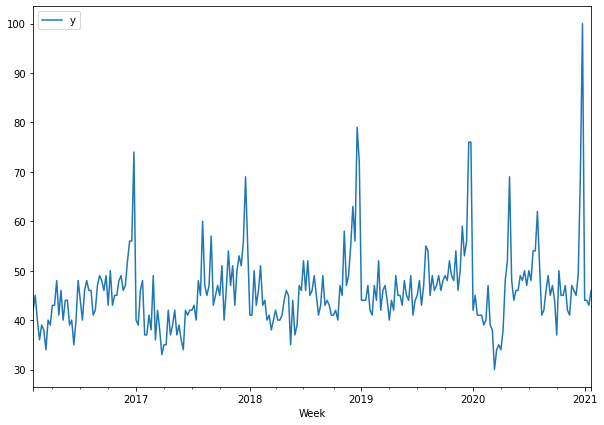

In [ ]:
#Visualization
df['y'].plot(figsize=(10,7), legend=True)

In [ ]:
# Checking stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(df['y'])
print("The p -value %F" %stationarity[1])

The p -value 0.000000


In [ ]:
# Training and Testing data
test_week= 10
training_set = df.iloc[:-test_week,:]
test_set = df.iloc[- test_week:, :]

In [ ]:
#Exogenous sets
train_exo = training_set.iloc[:,1:]
test_exo = test_set.iloc[:, 1:]

In [ ]:
# create model
from pmdarima import auto_arima
model = auto_arima(y = training_set['y'],
                   X = train_exo,
                   m= 52,
                   stepwise=True)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 52)   Log Likelihood                -772.231
Date:                            Sat, 28 May 2022   AIC                           1560.461
Time:                                    09:06:00   BIC                           1588.665
Sample:                                01-31-2016   HQIC                          1571.811
                                     - 11-15-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0128      1.479      4.066      0.000       3.115       8.911
Easter         1.5783      3.472      0.455      0.649      -5.227       8.384
Carnaval       7.4156      4.219      1.758      0.079      -0.853      15.684
Republic      11.6361      1.427      8.156      0.000       8.840      14.432
ar.L1          0.3816      0.051      7.483      0.000       0.282       0.482
ar.L2          0.2756      0.057      4.799      0.000       0.163       0.388
ar.S.L52       0.5865      0.044     13.451      0.000       0.501       0.672
sigma2        25.7746      2.090     12.335      0.000      21.679      29.870
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                42.99
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                             0.39
Prob(H) (two-sided):                  0.22   Kurtosis:                         4.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#predictions
predictions_sarimax_test = pd.Series(model.predict(n_periods=test_week,
                               X= test_exo)).rename("SARIMAX")
predictions_sarimax_test.index = test_set.index
predictions_sarimax_test

Week
2020-11-22    40.975880
2020-11-29    45.718972
2020-12-06    44.549941
2020-12-13    47.058503
2020-12-20    59.721854
2020-12-27    60.284565
2021-01-03    40.816002
2021-01-10    42.910699
2021-01-17    40.822779
2021-01-24    41.013642
Freq: W-SUN, Name: SARIMAX, dtype: float64

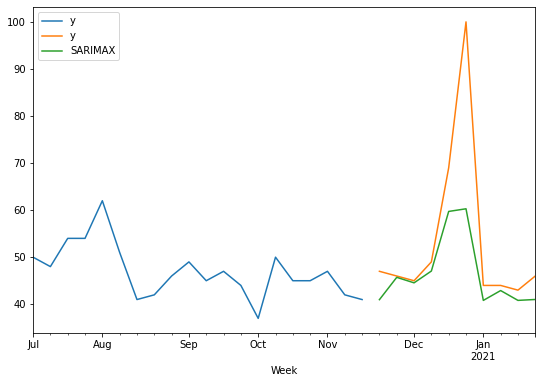

In [ ]:
#Visualization
#visualization
training_set['y']['2020-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax_test.plot(legend = True)

In [ ]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax_test)

9.71678579218758

In [ ]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_sarimax_test),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax_test)), 0))

7.0
13.0


In [ ]:
test_set

,y,Easter,Carnaval,Republic
Week,,,,
2020-11-22,47,0,0,0
2020-11-29,46,0,0,0
2020-12-06,45,0,0,0
2020-12-13,49,0,0,0
2020-12-20,69,0,0,0
2020-12-27,100,0,0,0
2021-01-03,44,0,0,0
2021-01-10,44,0,0,0
2021-01-17,43,0,0,0


In [ ]:
#Include the start date to your forecast
start = pd.to_datetime("2021-1-31")
#Include the number of days in you to forecast in the period 
#parameters. I put as a dummy 60.
times = pd.date_range(freq='7d', start=start, periods=10)
predictions_sarimax_test.index = times

In [ ]:
predictions_sarimax_test

2021-01-31    40.975880
2021-02-07    45.718972
2021-02-14    44.549941
2021-02-21    47.058503
2021-02-28    59.721854
2021-03-07    60.284565
2021-03-14    40.816002
2021-03-21    42.910699
2021-03-28    40.822779
2021-04-04    41.013642
Freq: 7D, Name: SARIMAX, dtype: float64

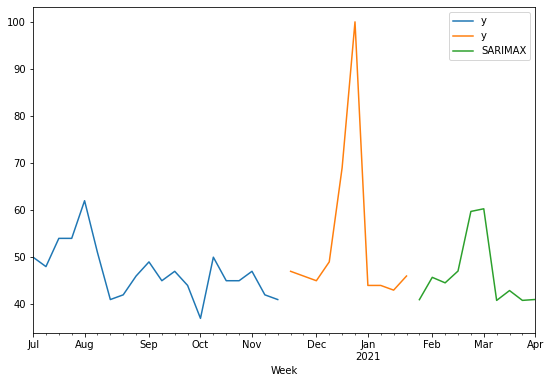

In [ ]:
#visualization
training_set['y']['2020-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_sarimax_test.plot(legend = True)

In [ ]:
#predictions 2
predictions_sarimax_test_2 = pd.Series(model.predict(n_periods=test_week+10,X= test_exo+10)).rename("SARIMAX")
predictions_sarimax_test_2.index = test_set.index
predictions_sarimax_test_2

ValueError: ignored